# 任务四
* 模型评估（2天） 记录5个模型（逻辑回归、SVM、决策树、随机森林、XGBoost）关于accuracy、precision，recall和F1-score、auc值的评分表格，并画出ROC曲线。

## 1 数据准备

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')

### 1.1 训练集测试集 

In [2]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [3]:
feature_iv = open('./data/feature_iv.txt', 'r')
list_selected_features = list()
for fin in feature_iv:
    feature,iv = fin.strip().split(';')
    if 0.02<= float(iv)<0.5 :
        list_selected_features.append(feature)

In [4]:
y_train = train_data['status']
X_train = train_data[list_selected_features] # 使用 iv值选择的特征
y_test = test_data['status']
X_test = test_data[list_selected_features] # 使用 iv值选择的特征

### 1.2 消除量纲

In [5]:
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)

## 2 模型训练
* 逻辑回归、SVM、决策树、随机森林、XGBoost

In [6]:
# LR
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelBinarizer
lr = LogisticRegression(C = 1.0, penalty='l2', multi_class='ovr')

# SVM
from sklearn.svm import SVC, LinearSVC, NuSVC

# DTree 
from sklearn.tree import DecisionTreeClassifier

# RF
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
LEARNING_RATE = 0.1
N_ESTIMATORS = 50
RANDOM_STATE = 2017
MAX_DEPTH = 9

# XGBoost
from xgboost.sklearn import XGBClassifier

RANDOM_STATE = 2018

model_dic = dict()

### 逻辑回归（LR）

In [7]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
model_dic['lr'] = lr

### SVM模型
参考：https://blog.csdn.net/zcc_0015/article/details/52151654
SVC参数解释
（1）C: 目标函数的惩罚系数C，用来平衡分类间隔margin和错分样本的，default C = 1.0；
（2）kernel：参数选择有RBF, Linear, Poly, Sigmoid, 默认的是"RBF";
（3）degree：if you choose 'Poly' in param 2, this is effective, degree决定了多项式的最高次幂；
（4）gamma：核函数的系数('Poly', 'RBF' and 'Sigmoid'), 默认是gamma = 1 / n_features;
（5）coef0：核函数中的独立项，'RBF' and 'Poly'有效；
（6）probablity: 可能性估计是否使用(true or false)；
（7）shrinking：是否进行启发式；
（8）tol（default = 1e - 3）: svm结束标准的精度;
（9）cache_size: 制定训练所需要的内存（以MB为单位）；
（10）class_weight: 每个类所占据的权重，不同的类设置不同的惩罚参数C, 缺省的话自适应；
（11）verbose: 跟多线程有关，不大明白啥意思具体；
（12）max_iter: 最大迭代次数，default = 1， if max_iter = -1, no limited;
（13）decision_function_shape ： ‘ovo’ 一对一, ‘ovr’ 多对多  or None 无, default=None
（14）random_state ：用于概率估计的数据重排时的伪随机数生成器的种子。

In [8]:
TOL = 1e-4
MAX_ITER = 1000

# 默认 高斯？
svm_rbf = SVC(kernel='rbf',probability=True, max_iter=MAX_ITER,tol=TOL, random_state=RANDOM_STATE,decision_function_shape='ovr').fit(X_train,y_train)

# 多项式
svm_poly = SVC(kernel='poly',max_iter=MAX_ITER,tol=TOL, random_state=RANDOM_STATE,decision_function_shape='ovr').fit(X_train,y_train)

# 线性
svm_linear = SVC(kernel='linear',max_iter=MAX_ITER,tol=TOL, random_state=RANDOM_STATE,decision_function_shape='ovr').fit(X_train,y_train)

# sigmoid
svm_sigmoid = SVC(kernel='sigmoid',max_iter=MAX_ITER,tol=TOL, random_state=RANDOM_STATE,decision_function_shape='ovr').fit(X_train,y_train)

model_dic['svm'] = svm_rbf

### 决策树和随机森林

In [9]:
LEARNING_RATE = 0.1
N_ESTIMATORS = 50
MAX_DEPTH = 9

DTree = DecisionTreeClassifier(max_depth=MAX_DEPTH,random_state=RANDOM_STATE).fit(X_train, y_train)
model_dic['dt'] = DTree
RF = RandomForestClassifier(n_estimators=N_ESTIMATORS,max_depth=MAX_DEPTH,random_state=RANDOM_STATE).fit(X_train, y_train)
model_dic['rf'] = RF

### XGBoost

In [10]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
# model_dic['xgb'] = xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

## 3 模型评分结果对比
* accuracy、precision，recall和F1-score、auc值的评分表格
* 并画出ROC曲线

In [11]:
! python model_metrics.py

In [14]:
model_dic.keys()

dict_keys(['lr', 'svm', 'dt', 'rf'])

### lr

[准确率] 训练集： 0.7851 测试集： 0.4674
[精准率] 训练集： 0.7164 测试集： 0.7384
[召回率] 训练集： 0.2362 测试集： 0.5292
[f1-score] 训练集： 0.3553 测试集： 0.3333
[auc值] 训练集： 0.7676 测试集： 0.4821


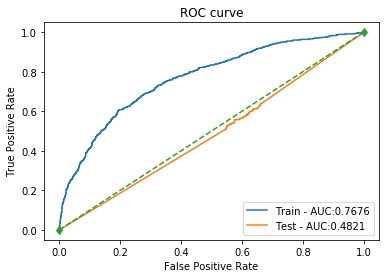

In [15]:
from model_metrics import model_metrics
model_metrics(model_dic['lr'], X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

### svm

[准确率] 训练集： 0.8046 测试集： 0.7484
[精准率] 训练集： 0.8358 测试集： 0.7484
[召回率] 训练集： 0.2746 测试集： 0.0000
[f1-score] 训练集： 0.4134 测试集： 0.0000
[auc值] 训练集： 0.8507 测试集： 0.5000


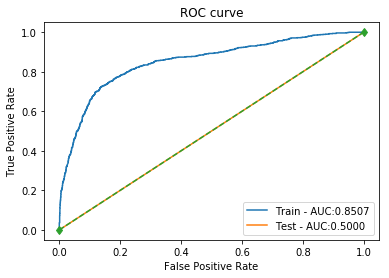

In [16]:
model_metrics(model_dic['svm'], X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

### dt

[准确率] 训练集： 0.8828 测试集： 0.6692
[精准率] 训练集： 0.8491 测试集： 0.7354
[召回率] 训练集： 0.6475 测试集： 0.0669
[f1-score] 训练集： 0.7347 测试集： 0.0923
[auc值] 训练集： 0.9156 测试集： 0.4689


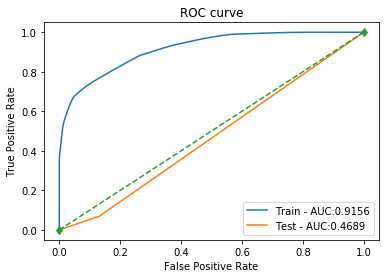

In [17]:
model_metrics(model_dic['dt'], X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

### rf-随机森林

[准确率] 训练集： 0.8819 测试集： 0.5992
[精准率] 训练集： 1.0000 测试集： 0.7952
[召回率] 训练集： 0.5288 测试集： 0.5209
[f1-score] 训练集： 0.6918 测试集： 0.3953
[auc值] 训练集： 0.9730 测试集： 0.6043


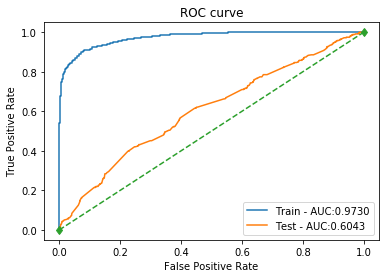

In [18]:
model_metrics(model_dic['rf'], X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)